In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

In [3]:
def prepare_frames_params(steps, num_frames):    
    result = None
    for i in range(0, len(steps), 2):
        x_min, x_max, y_min, y_max, num_iters = steps[i]
        next_x_min, next_x_max, next_y_min, next_y_max, next_num_iters = steps[i+1]
        
        X_min = np.linspace(x_min, next_x_min, num_frames)
        X_max = np.linspace(x_max, next_x_max, num_frames)
        Y_min = np.linspace(y_min, next_y_min, num_frames)
        Y_max = np.linspace(y_max, next_y_max, num_frames)
        ITERS_max = np.ceil(np.linspace(num_iters, next_num_iters, num_frames))
        
        stack = np.stack((X_min, X_max, Y_min, Y_max, ITERS_max), axis=1)
        if result is None:
            result = stack
        else:
            result = np.vstack((result, stack))
            
    return result


In [4]:
def remap_range(old_min, old_max, new_min, new_max, old_value):
    old_range = old_max - old_min
    new_range = new_max - new_min
    return (((old_value - old_min) * new_range) / old_range) + new_min

def mandelbrot_set(c, max_iterations):
    z = 0
    history = [z]
    
    for iters in range(max_iterations):
        z = z**2 + c
        if abs(z) > 2: 
            break

    return iters
    
    
def draw_mandelbrot_set(x_min, x_max, y_min, y_max, max_iterations, num_points):
    max_iterations = 200
    X = np.linspace(x_min, x_max, num_points)
    Y = np.linspace(y_min, y_max, num_points)

    image = np.zeros((num_points, num_points))
    
    for xi, x in enumerate(X):
        for yi, y in enumerate(Y):
            c = complex(x, y)
            iters = mandelbrot_set(c, max_iterations)
            image[xi, yi] = remap_range(0, max_iterations, 0, 1, iters)
         
    return image.T

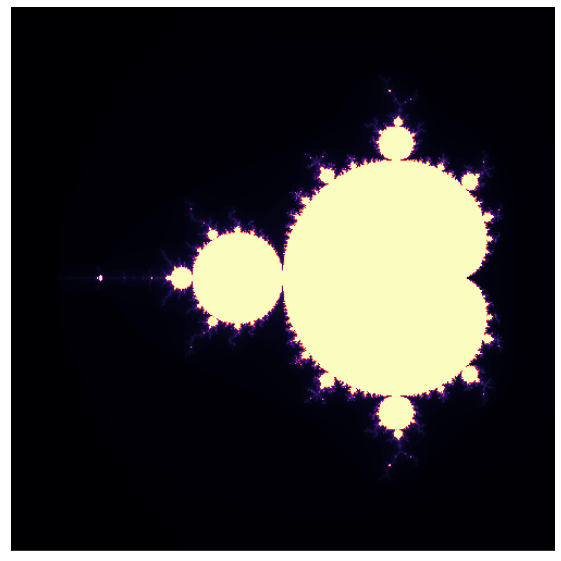

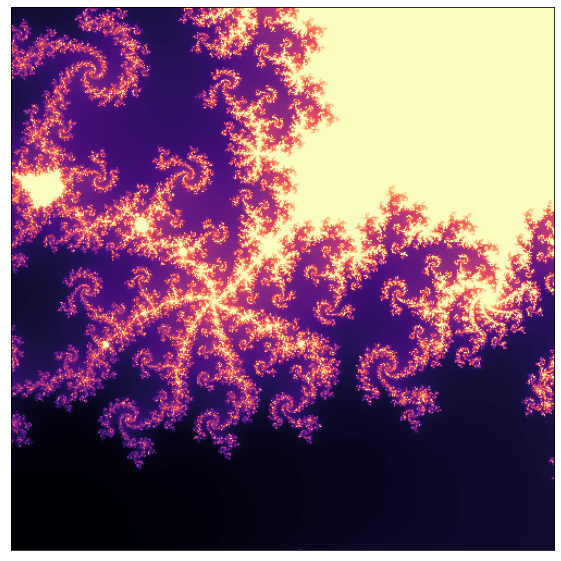

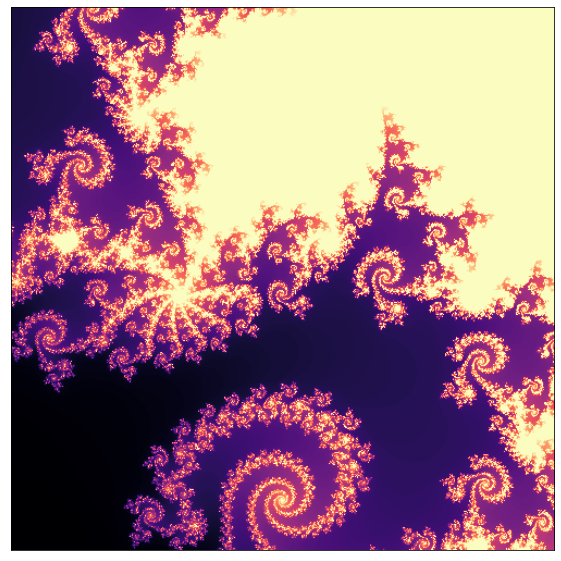

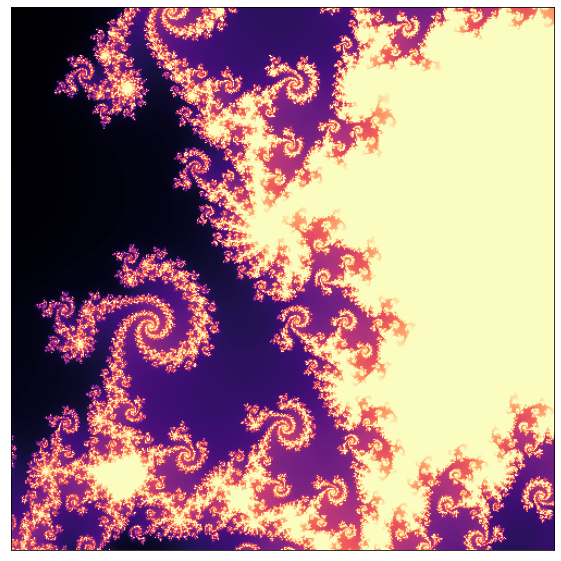

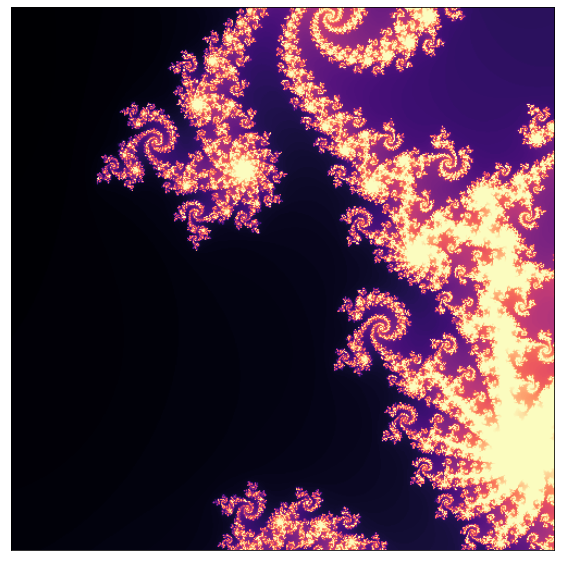

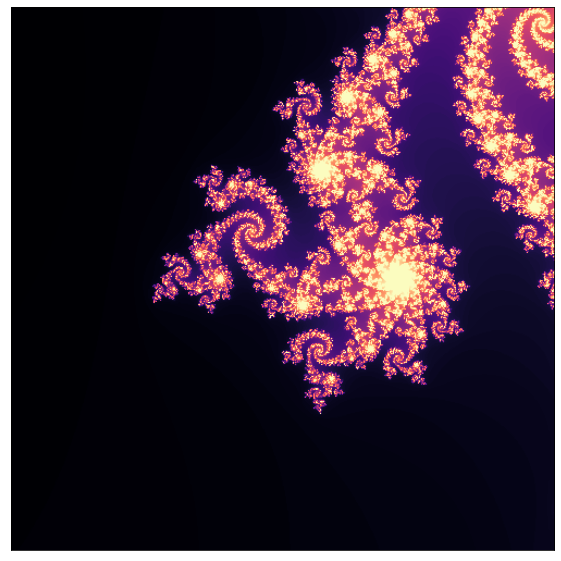

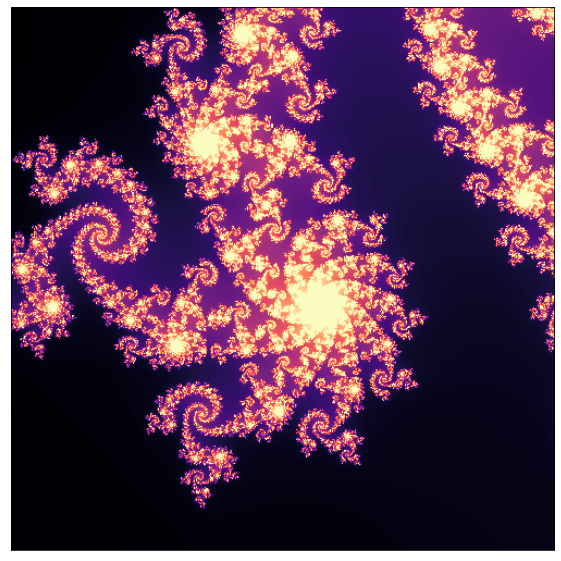

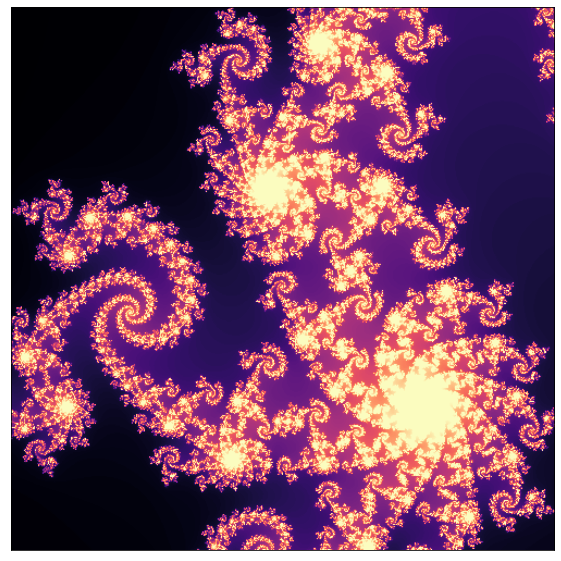

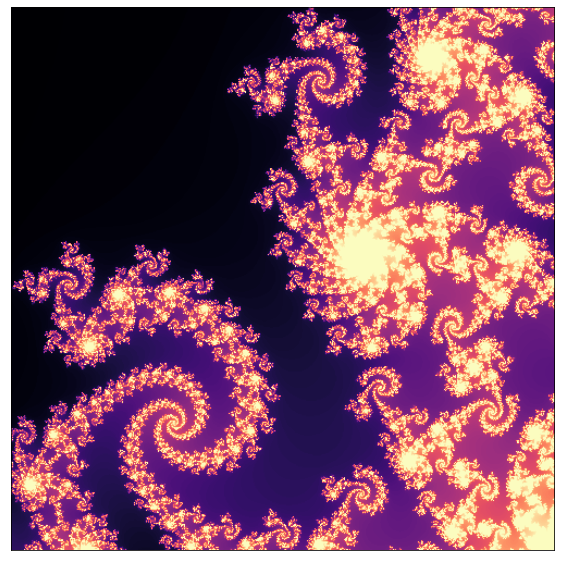

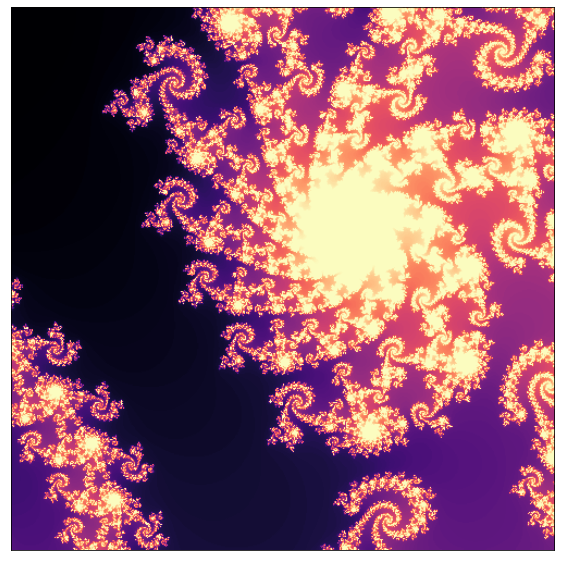

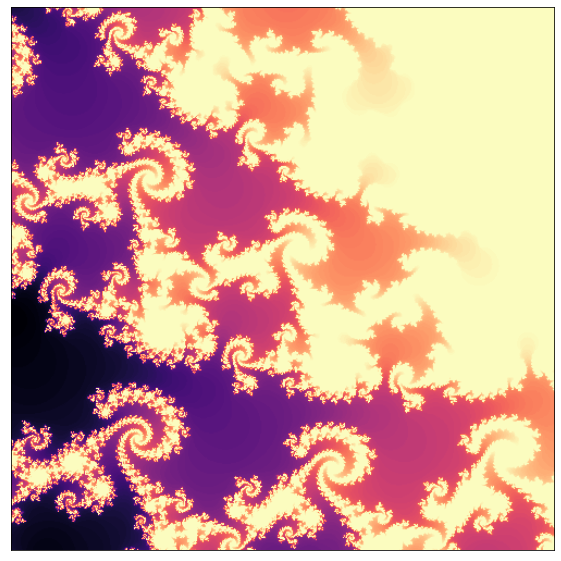

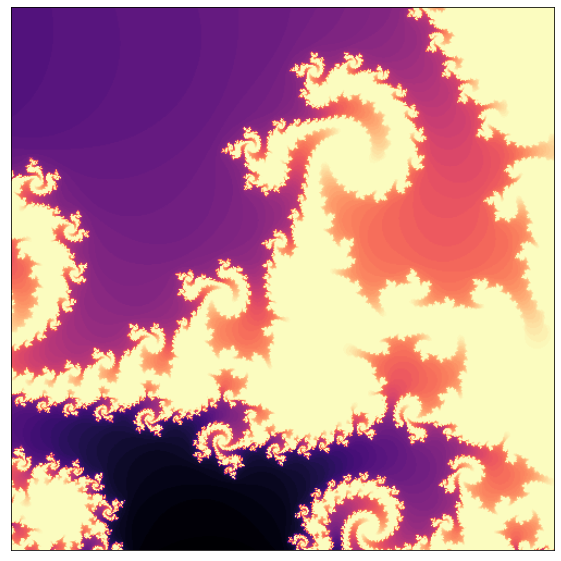

In [5]:
width = 10
height = 10
num_points = 500
# x_min, x_max, y_min, y_max, num_interations

steps = [[ -2.25, 0.75, -1.5, 1.5, 40], 
              [-0.22, -0.21, -0.70, -0.69, 120],
              [-0.20, -0.19, -0.68, -0.67, 160],
              [-0.20, -0.195, -0.68, -0.675, 200],
              [-0.20, -0.1975, -0.68, -0.6775, 230],
              [-0.20, -0.1985, -0.68, -0.6785, 280],
              [-0.1995, -0.1985, -0.6798, -0.6788, 330],
              [-0.1995, -0.19875, -0.6798, -0.67905, 380],
              [-0.1995, -0.19895, -0.6798, -0.67925, 430],
              [-0.1993, -0.19905, -0.67965, -0.6794, 550],
              [-0.19919, -0.199155, -0.6795495, -0.6795145, 600],
              [-0.199175, -0.1991705, -0.6795295, -0.679525, 700]]


for step in steps:
    fig = plt.figure(0, figsize=(width, height))
    plt.gca().set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(draw_mandelbrot_set(*step, num_points), interpolation='bilinear', cmap='magma')
    plt.show()

INIT
INIT


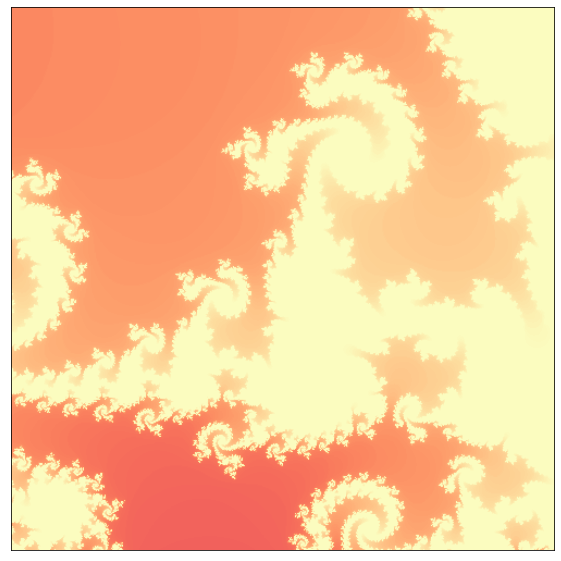

In [6]:
frame_params = steps #prepare_frames_params(steps, 20)

fig = plt.figure(0, figsize=(width, height))
plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])

im = plt.imshow(draw_mandelbrot_set(*frame_params[0], num_points), interpolation='bilinear', cmap='magma')

def init():
    print("INIT")
    im.set_data(np.zeros((num_points, num_points)))
    return [im]

def update(frame):
    image = draw_mandelbrot_set(*frame_params[frame], num_points)
    im.set_array(image)
    return [im]


anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(frame_params))
anim.save("test.gif")
#plt.show()